# Frozen Lake: Naive Learning

In reinforcement learning, an agent is acting in an environment, and learning by trial-and-error to optimize its performance in order to gain maximal cumulative reward. The model of the environment can be formalized by a Markov Decision Process (MDP), from which the optimal policy can be derived applying dynamic programming algorithms. If the MDP is not known, however, the agent has to find it out by interacting with the environment. This notebook discusses a naive learning strategy in which the agent runs many episodes while taking samples to build the MDP. This empirical MDP is used to approximate the optimal policy applying the dynamic programming methods. 

## Import module ReinforcementLearning 

First the "ReinforcementLearning" module is imported, which also imports packages "numpy" as "np" and "matplotlib.pyplot" as "plt". Matplotlib is set to the interactive "notebook" mode:

In [1]:
from ReinforcementLearning import *
%matplotlib notebook

This module contains a class "NaiveStrategy" that implements the naive learning strategy discussed in the introduction. It uses a class "EmpiricalMDP" which is a subclass of "MarkovDecisionProcess". This "EmpiricalMDP" stores the samples taken by the agent, using them to approximate the state transition probability matrix "Psas" and the reward matrix "Rsas". Class "Agent" is used to create an agent, and the "FrozenLake" class to define a deterministic and a stochastic Frozen Lake environment to test the naive learning strategy.

## Deterministic Frozen Lake Environment 

First the naive strategy is tested in a deterministic "FrozenLake" environment:

In [2]:
env = FrozenLake.make(is_slippery=False)

The agent needs a policy to run many episodes and to take samples. A uniform random policy seems appropriate here as the agent has to pass all states:

In [3]:
policy = UniformRandomPolicy(env)

Now the policy is defined, a "NaiveStrategy" object can be constructed: 

In [4]:
strategy = NaiveStrategy(num_of_episodes=1000, policy=policy)

The first argument is the number of episodes the agent has to run. In this case, 1000 episodes will be sufficient to approximate the MDP. Finally, an "Agent" object is constructed that needs the "FrozenLake" object and the "NaiveStrategy" object:

In [5]:
agent = Agent(env, strategy)  # env is stored in attribute agent.env, strategy in attribute agent.strategy

Class "Agent" has a "learn" method to execute the given learning strategy: 

In [6]:
agent.learn()

The "NaiveStrategy" object has a attribute "mdp", which is an "EmpiricalMDP" object that holds the approximated "Psas" and "Rsas" matrices. To verify these matrices, a "GymMDP" object is constructed which defines the exact MDP:

In [7]:
mdp = GymMDP(env)

Because the probabilities are approximated using state and action frequencies, both MDPs must be the same in the deterministic case, if the agent passed all states:

In [8]:
print(np.all(strategy.mdp.Psas == mdp.Psas))  # must be True
print(np.all(strategy.mdp.Rsas == mdp.Rsas))  # must be True

True
True


Now the optimal policy and optimal value functions can be calculated using the "policy_iteration" or the "value_iteration" method of the "EmpiricalMDP" object, which it inherited from the "MarkovDecisionProcess" superclass:

[[1. 1. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [0. 1. 1. 0.]]
[[1. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]]


<IPython.core.display.Javascript object>


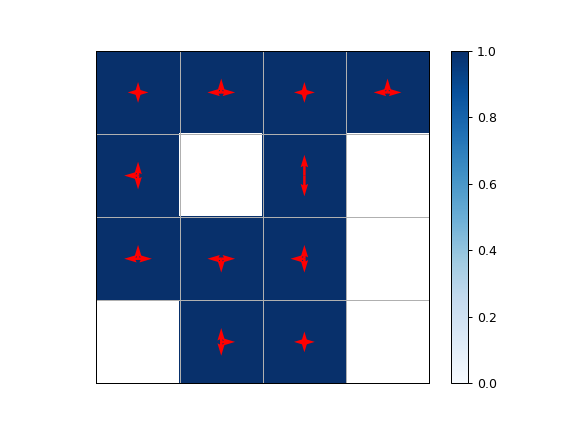

In [9]:
policy, Vs, Qsa = strategy.mdp.value_iteration()
print(np.reshape(Vs, (4, 4), order="C"))
print(Qsa)
env.plot(policy=policy, values=Vs)

## Stochastic Frozen Lake Environment 

The naive learning strategy can also be applied in a stochastich environment:

In [10]:
env = FrozenLake.make()

The steps are the same as in the deterministic case. A "NaiveStrategy" object is created first with 1000 number of episodes and a uniform random policy. The environment and strategy objects are used then to create an "Agent" object:

In [11]:
strategy = NaiveStrategy(num_of_episodes=10000, 
                         policy=UniformRandomPolicy(env))
agent = Agent(env, strategy)

The agent executes the naive learning strategy by collecting samples while running the 10000 episodes. This is done by calling the "Agent" object's method "learn":

In [12]:
agent.learn()

To verify the agent's empirical MDP, class "GymMDP" is used to get the exact MDP from the "FrozenLake" environment:

In [13]:
mdp = GymMDP(env)

In the stochastic case, the empirical MDP is not the same as the exact MDP. Verifying the state transition probabilities of taking action 2 in state 9 gives, for instance:

In [14]:
state = 9
action = 2

print("Exact MDP:")
print(mdp.Psas[state, action, :])

print("\nEmpirical MDP:")
print(strategy.mdp.Psas[state, action, :])

Exact MDP:
[0.         0.         0.         0.         0.         0.33333333
 0.         0.         0.         0.         0.33333333 0.
 0.         0.33333333 0.         0.        ]

Empirical MDP:
[0.         0.         0.         0.         0.         0.34366197
 0.         0.         0.         0.         0.33239437 0.
 0.         0.32394366 0.         0.        ]


Although the empirical probabilities are not the same as the exact probabilities, the first seem to be a good approximation of the latter. To check if this is true for all states and actions, the optimal policy and optimal value functions from both exact and empirical MDP are calculated and compared. 

First the optimal policy and optimal value functions for the exact MDP are calculated:

[[0.74419029 0.71786905 0.69921264 0.68954284]
 [0.74998193 0.         0.47290225 0.        ]
 [0.7611395  0.7768436  0.72358054 0.        ]
 [0.         0.84920568 0.9239777  0.        ]]
[[0.74419029 0.73520367 0.73520367 0.73322461]
 [0.48582087 0.47945192 0.47046531 0.71786905]
 [0.62763433 0.62433348 0.61796453 0.69921264]
 [0.46079551 0.46079551 0.45749466 0.68954284]
 [0.74998193 0.50257818 0.50059912 0.49678655]
 [0.         0.         0.         0.        ]
 [0.47290225 0.24085407 0.47290225 0.23204818]
 [0.         0.         0.         0.        ]
 [0.50257818 0.51175669 0.50794412 0.7611395 ]
 [0.53598953 0.7768436  0.52364822 0.49404945]
 [0.72358054 0.56641152 0.46501923 0.41573033]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.54135547 0.59064436 0.84920568 0.56641152]
 [0.83149843 0.9239777  0.88203761 0.85698156]
 [0.         0.         0.         0.        ]]


<IPython.core.display.Javascript object>


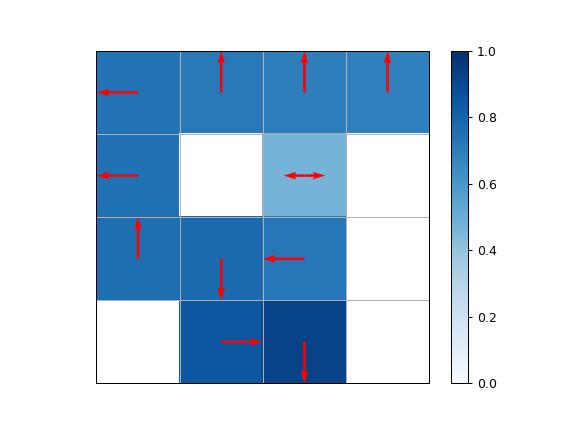

In [15]:
policy, Vs, Qsa = mdp.value_iteration()
print(np.reshape(Vs, (4, 4), order="C"))
print(Qsa)
env.plot(policy=policy, values=Vs)

The optimal policy and value functions for the empirical MDP calculated using policy iteration:

[[0.85791091 0.85791057 0.85791034 0.85791021]
 [0.85791097 0.         0.55818673 0.        ]
 [0.85791111 0.8579113  0.80181079 0.        ]
 [0.         0.91541454 0.96828045 0.        ]]
[[0.85791093 0.85791082 0.85791082 0.8579108 ]
 [0.56278099 0.55394166 0.57576782 0.85791061]
 [0.7632046  0.7638188  0.75110978 0.85791038]
 [0.6194041  0.58928393 0.56386841 0.85791026]
 [0.857911   0.57230476 0.5749205  0.56637211]
 [0.         0.         0.         0.        ]
 [0.55644706 0.29848431 0.55818675 0.23159551]
 [0.         0.         0.         0.        ]
 [0.58865015 0.5588297  0.56255284 0.85791113]
 [0.6143131  0.85791131 0.56306013 0.54296595]
 [0.8018108  0.57785212 0.51371693 0.48424767]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.53356454 0.6209278  0.91541455 0.59877102]
 [0.90097424 0.96828045 0.92618595 0.91329707]
 [0.         0.         0.         0.        ]]


<IPython.core.display.Javascript object>


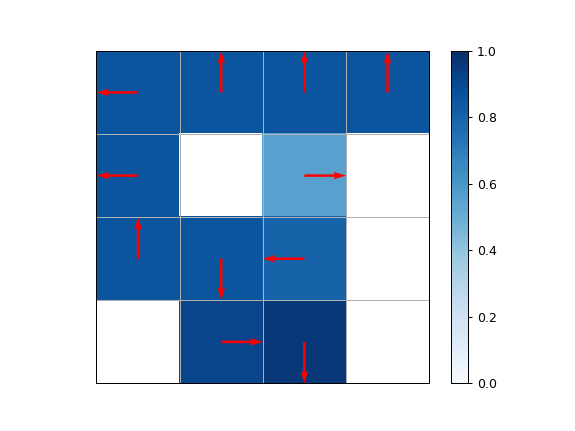

In [16]:
policy, Vs, Qsa = strategy.mdp.policy_iteration(inner=500, outer=100)
print(np.reshape(Vs, (4, 4), order="C"))
print(Qsa)
env.plot(policy=policy, values=Vs)

Note that "policy_iteration" method's optional argument "inner" is set to 500, because the iterative solver is preferred in this case, as the matrix system sometimes is close to singular, giving inaccurate results applying the direct solver.

The optimal policy and value functions for the empirical MDP can also be calculated using value iteration:

[[0.85791175 0.85791175 0.85791175 0.85791175]
 [0.85791175 0.         0.55818734 0.        ]
 [0.85791175 0.85791175 0.80181119 0.        ]
 [0.         0.91541483 0.96828056 0.        ]]
[[0.85791175 0.85791175 0.85791175 0.85791175]
 [0.56278165 0.55394238 0.57576869 0.85791175]
 [0.76320568 0.76381993 0.75111095 0.85791175]
 [0.61940516 0.58928494 0.56386942 0.85791175]
 [0.85791175 0.57230523 0.574921   0.56637264]
 [0.         0.         0.         0.        ]
 [0.55644769 0.29848446 0.55818734 0.2315959 ]
 [0.         0.         0.         0.        ]
 [0.58865063 0.55883006 0.56255324 0.85791175]
 [0.61431342 0.85791175 0.56306035 0.54296629]
 [0.80181119 0.57785231 0.51371717 0.48424804]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.53356475 0.62092794 0.91541483 0.59877123]
 [0.9009745  0.96828056 0.92618612 0.91329728]
 [0.         0.         0.         0.        ]]


<IPython.core.display.Javascript object>


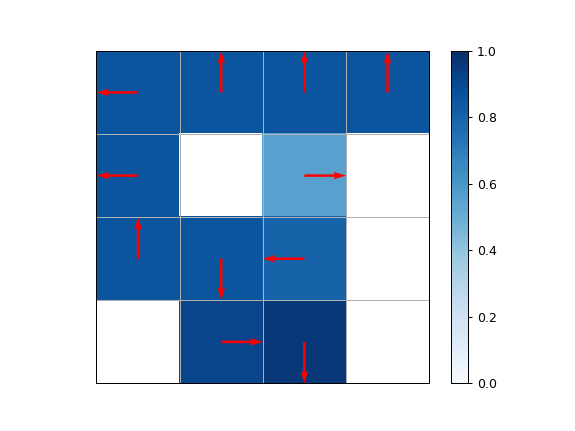

In [17]:
policy, Vs, Qsa = strategy.mdp.value_iteration(outer=1000)
print(np.reshape(Vs, (4, 4), order="C"))
print(Qsa)
env.plot(policy=policy, values=Vs)

The optimal policy derived from the empirical MDP is not the same as in the exact MDP case, but is very close, as a large number of episodes was run by the agent. The value functions derived from the empirical MDP are also approximated accurately.